# <a href="https://miptstats.github.io/courses/ad_fivt.html">Введение в анализ данных</a>
## Домашнее задание 5. Вероятность. 


**Правила, <font color="red">прочитайте внимательно</font>:**


* Выполненную работу нужно отправить телеграм-боту `@miptstats_ds23_bot`. Для начала работы с ботом каждый раз отправляйте `/start`. Дождитесь подтверждения от бота, что он принял файл. Если подтверждения нет, то что-то не так. **Работы, присланные иным способом, не принимаются.**
* Дедлайн см. в боте. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Прислать нужно **ноутбук в формате `ipynb`**. Если вы строите интерактивные графики, их стоит прислать в формате html.
* Следите за размером файлов. **Бот не может принимать файлы весом более 20 Мб.** Если файл получается больше, заранее разделите его на несколько.
* Выполнять задание необходимо полностью самостоятельно. **При обнаружении списывания все участники списывания будут сдавать устный зачет.**
* Решения, размещенные на каких-либо интернет-ресурсах, не принимаются. Кроме того, публикация решения в открытом доступе может быть приравнена к предоставлении возможности списать.
* Для выполнения задания используйте этот ноутбук в качестве основы, ничего не удаляя из него. Можно добавлять необходимое количество ячеек.
* Комментарии к решению пишите в markdown-ячейках.
* Выполнение задания (ход решения, выводы и пр.) должно быть осуществлено на русском языке.
* Если код будет не понятен проверяющему, оценка может быть снижена.
* Никакой код из данного задания при проверке запускаться не будет. *Если код студента не выполнен, недописан и т.д., то он не оценивается.*
* **Код из рассказанных на занятиях ноутбуков** можно использовать без ограничений.

---


**Баллы за задание:**

<b><font color="blue">Легкая часть</font></b> (достаточно на "хор"):
* Задача 1 &mdash; 35 баллов за контест и 5 баллов за ноутбук
* Задача 2 &mdash; 20 баллов

<b><font color="orange">Сложная часть</font></b> (необходимо на "отл"):
* Задача 3 &mdash; 40 баллов

In [2]:
# Bot check

# HW_ID: fpmi_ad5
# Бот проверит этот ID и предупредит, если случайно сдать что-то не то.

# Status: final
# Перед отправкой в финальном решении удали "not" в строчке выше.
# Так бот проверит, что ты отправляешь финальную версию, а не промежуточную.
# Никакие значения в этой ячейке не влияют на факт сдачи работы.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='whitegrid', font_scale=1.3, palette='Set2')
%matplotlib inline

### <font color="blue"><i>Легкая часть</i></font>


### Задача 1.

Условие задачи в контесте, ссылка на который отправлена через бот.

Продублируйте сюда написанный код и постройте требуемые графики, которые при необходимости можно доработать.

In [3]:
import numpy as np
import matplotlib.pyplot as plt

import scipy.stats as sps

coin = sps.bernoulli(p=0.5).rvs
uniform_pdf = sps.uniform.pdf
norm_pdf = sps.norm.pdf
expon_pdf = sps.expon.pdf

def uniform(size=1, precision=30):
    coin_array = coin(np.prod(size) * precision).reshape(np.prod(size), precision)
    geom_array = np.geomspace(1/2, 1/2**precision, precision)
    result_array = (coin_array @ geom_array).reshape(size)
    return result_array

def plot_uniform_density(size=200):
    grid = np.linspace(-0.25, 1.25, 500)
    plt.figure(figsize=(15,8))
    plt.title(r"$\xi \sim U[0, 1]$")
    plt.scatter(uniform(size), np.zeros(size), alpha=0.4)
    plt.hist(uniform(size), bins=10, density=True, alpha=0.4, label=r"Гистограмма $\xi \sim U[0, 1]$", color='red')
    plt.plot(grid, uniform_pdf(grid), linewidth=3, label=r"Плотность $\xi \sim U[0, 1]$", color='blue')
    plt.legend()
    return plt.gcf()

def plot_uniform_different_precision(size=100):
    plt.figure(figsize=(15, 3))
    for i, precision in enumerate([1, 2, 3, 5, 10, 30]):
        plt.subplot(3, 2, i + 1)
        plt.suptitle("Зависимость случайных величин от точности")
        plt.scatter(
            uniform(size, precision),
            np.zeros(size),
            alpha=0.4,
         )
        
        plt.yticks([])
        
        if i < 4:
            plt.xticks([])
            
    return plt.gcf()


def normal(size=1, loc=0, scale=1, precision=30):
    return loc + scale * np.cos(2 * np.pi * uniform(size, precision)) * np.sqrt(-2 * np.log(uniform(size, precision)))

def plot_normal_density(size=200):
    grid = np.linspace(-3, 3, 500)
    plt.figure(figsize=(15, 8))
    plt.title(r"$\xi \sim N[0, 1]$")
    plt.scatter(normal(size), np.zeros(size), alpha=0.4)
    plt.hist(normal(size), bins=10, density=True, alpha=0.4, label=r"Гистограмма $\xi \sim N(0, 1)$", color='red')
    plt.plot(grid, norm_pdf(grid), linewidth=3, label=r"Плотность $\xi \sim N(0, 1)$", color='blue')
    plt.legend()
    return plt.gcf()

def expon(size=1, lambd=1, precision=30):
    return (-1) * np.log(uniform(size, precision)) / lambd

def plot_expon_density(size=100):
    grid = np.linspace(-0.5, 5, 500)
    plt.figure(figsize=(15, 8))
    plt.title(r"$\xi \sim Exp(1)$")
    plt.scatter(expon(size), np.zeros(size), alpha=0.4)
    plt.hist(expon(size), bins=10, density=True, alpha=0.4, label=r"Гистограмма $\xi \sim Exp(1)$", color='red')
    plt.plot(grid, expon_pdf(grid), linewidth=3, label=r"Плотность $\xi \sim Exp(1)$", color='blue')
    plt.legend()
    return plt.gcf()

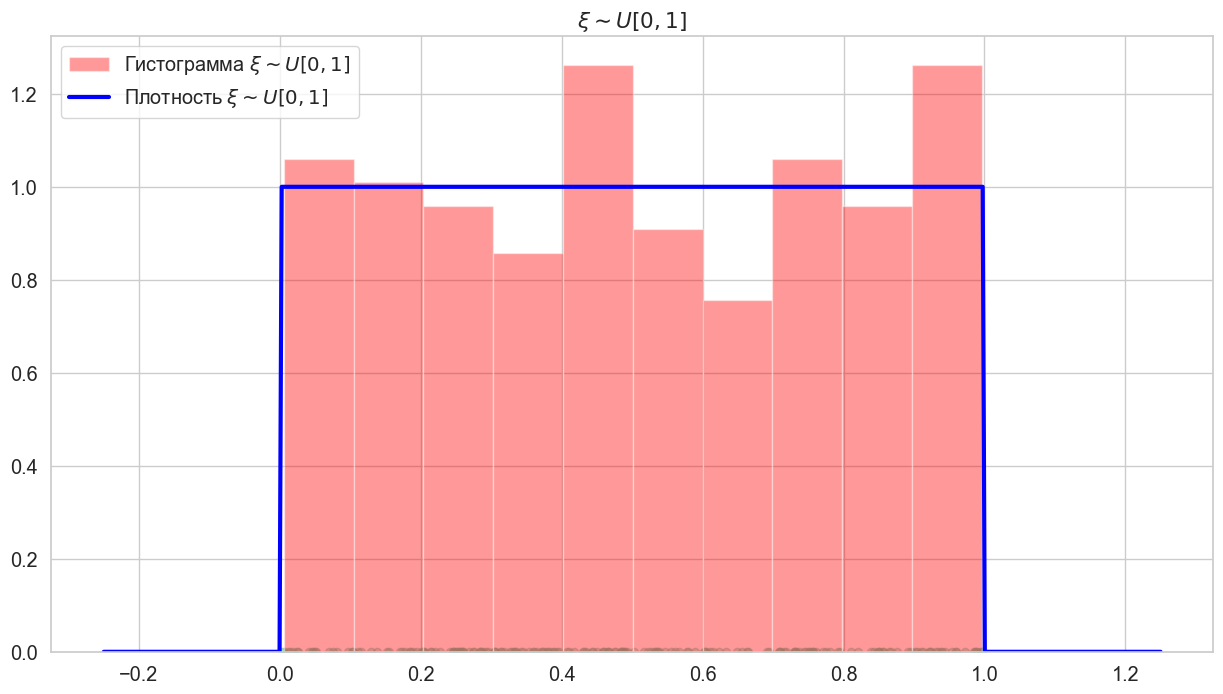

In [4]:
gr = plot_uniform_density()

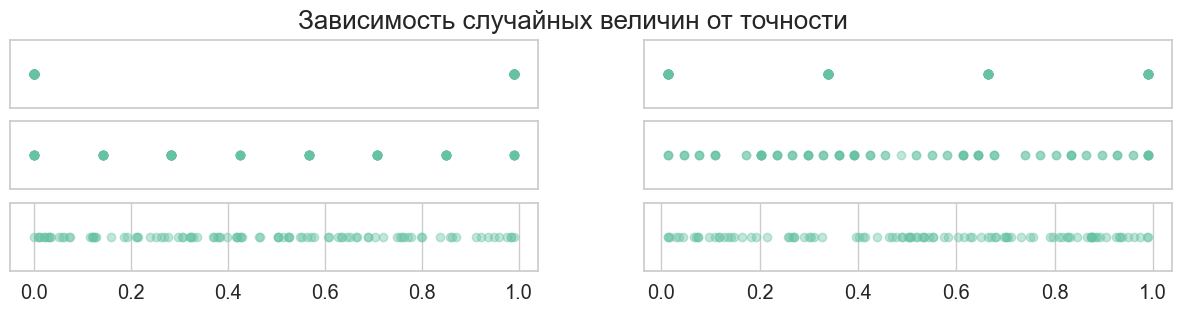

In [5]:
gr = plot_uniform_different_precision()

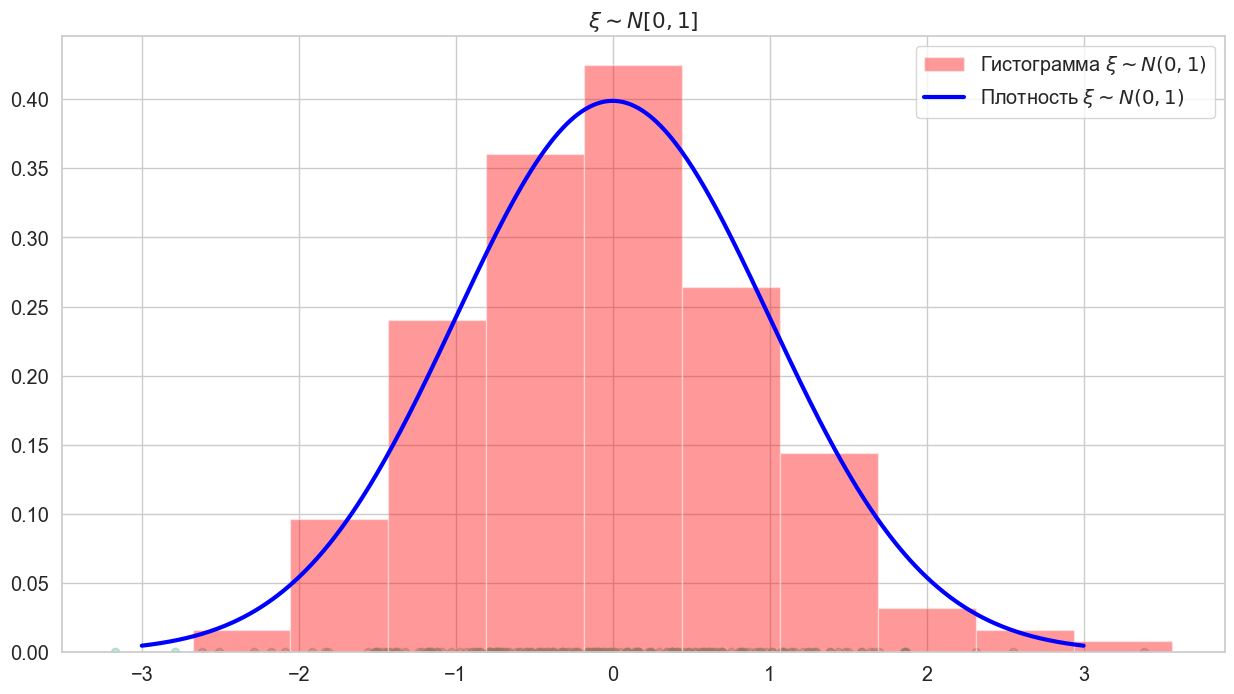

In [6]:
gr = plot_normal_density()

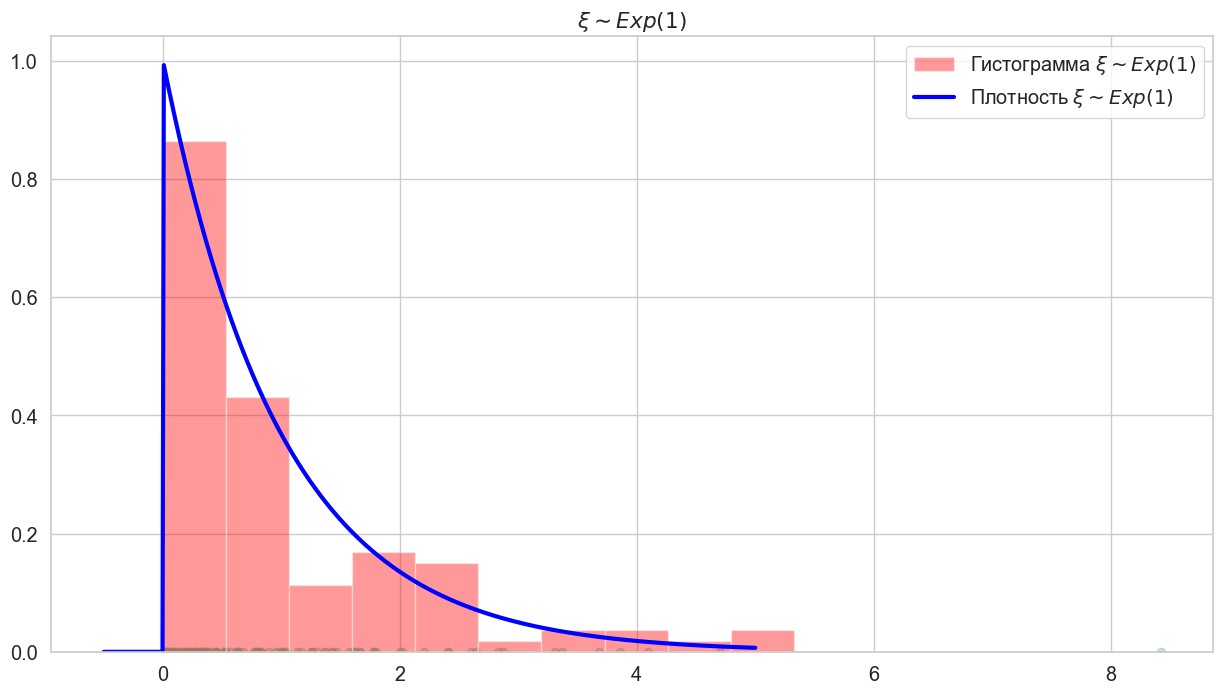

In [7]:
gr = plot_expon_density()

**Выводы:**

С помощью случайных величин из равномерного распределения на [0, 1] можно получить случайные величины нормального и экспоненциального распределений с заданной точностью.

---

### Задача 2.

Рассмотрим распределение Коши с плотностью
$$p(x) = \frac{1}{\pi(1+x^2)}$$
для $x\in\mathbb{R}$, которое известно своими тяжелыми хвостами. Иначе говоря, плотность убывает медленно при $x \to \infty$. Сравните, например, с нормальным или экспоненциальным распределениями. В частности, из-за этого у распределения Коши даже не существует математического ожидания.

За распределение Коши отвечает класс <a target="_black" href="https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.cauchy.html">`scipy.stats.cauchy`</a>.

**1.** Визуализируйте на одном графики плотности нормального распределения и распределения Коши. Что можно сказать?

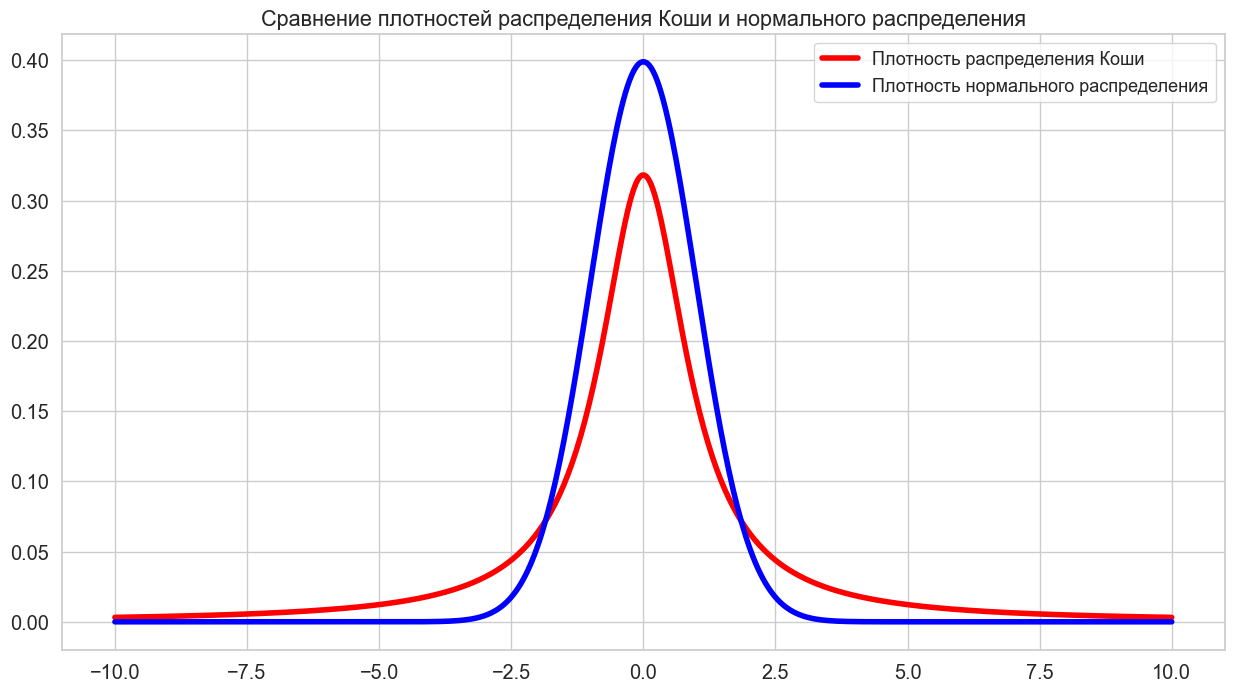

In [22]:
grid = np.linspace(-10, 10, 500)
plt.figure(figsize=(15, 8))
plt.title("Сравнение плотностей распределения Коши и нормального распределения")
plt.plot(grid, sps.cauchy.pdf(grid), linewidth=4, label=r"Плотность распределения Коши", color='red')
plt.plot(grid, sps.norm.pdf(grid), linewidth=4, label=r"Плотность нормального распределения", color='blue')
plt.legend(fontsize=13)
plt.show()

**2.** Повторите эксперимент с <a href="https://miptstats.github.io/courses/ad_fivt/lec3_LLN.html">занятия</a> про закон больших чисел для распределения Коши. Выполняется ли закон? 

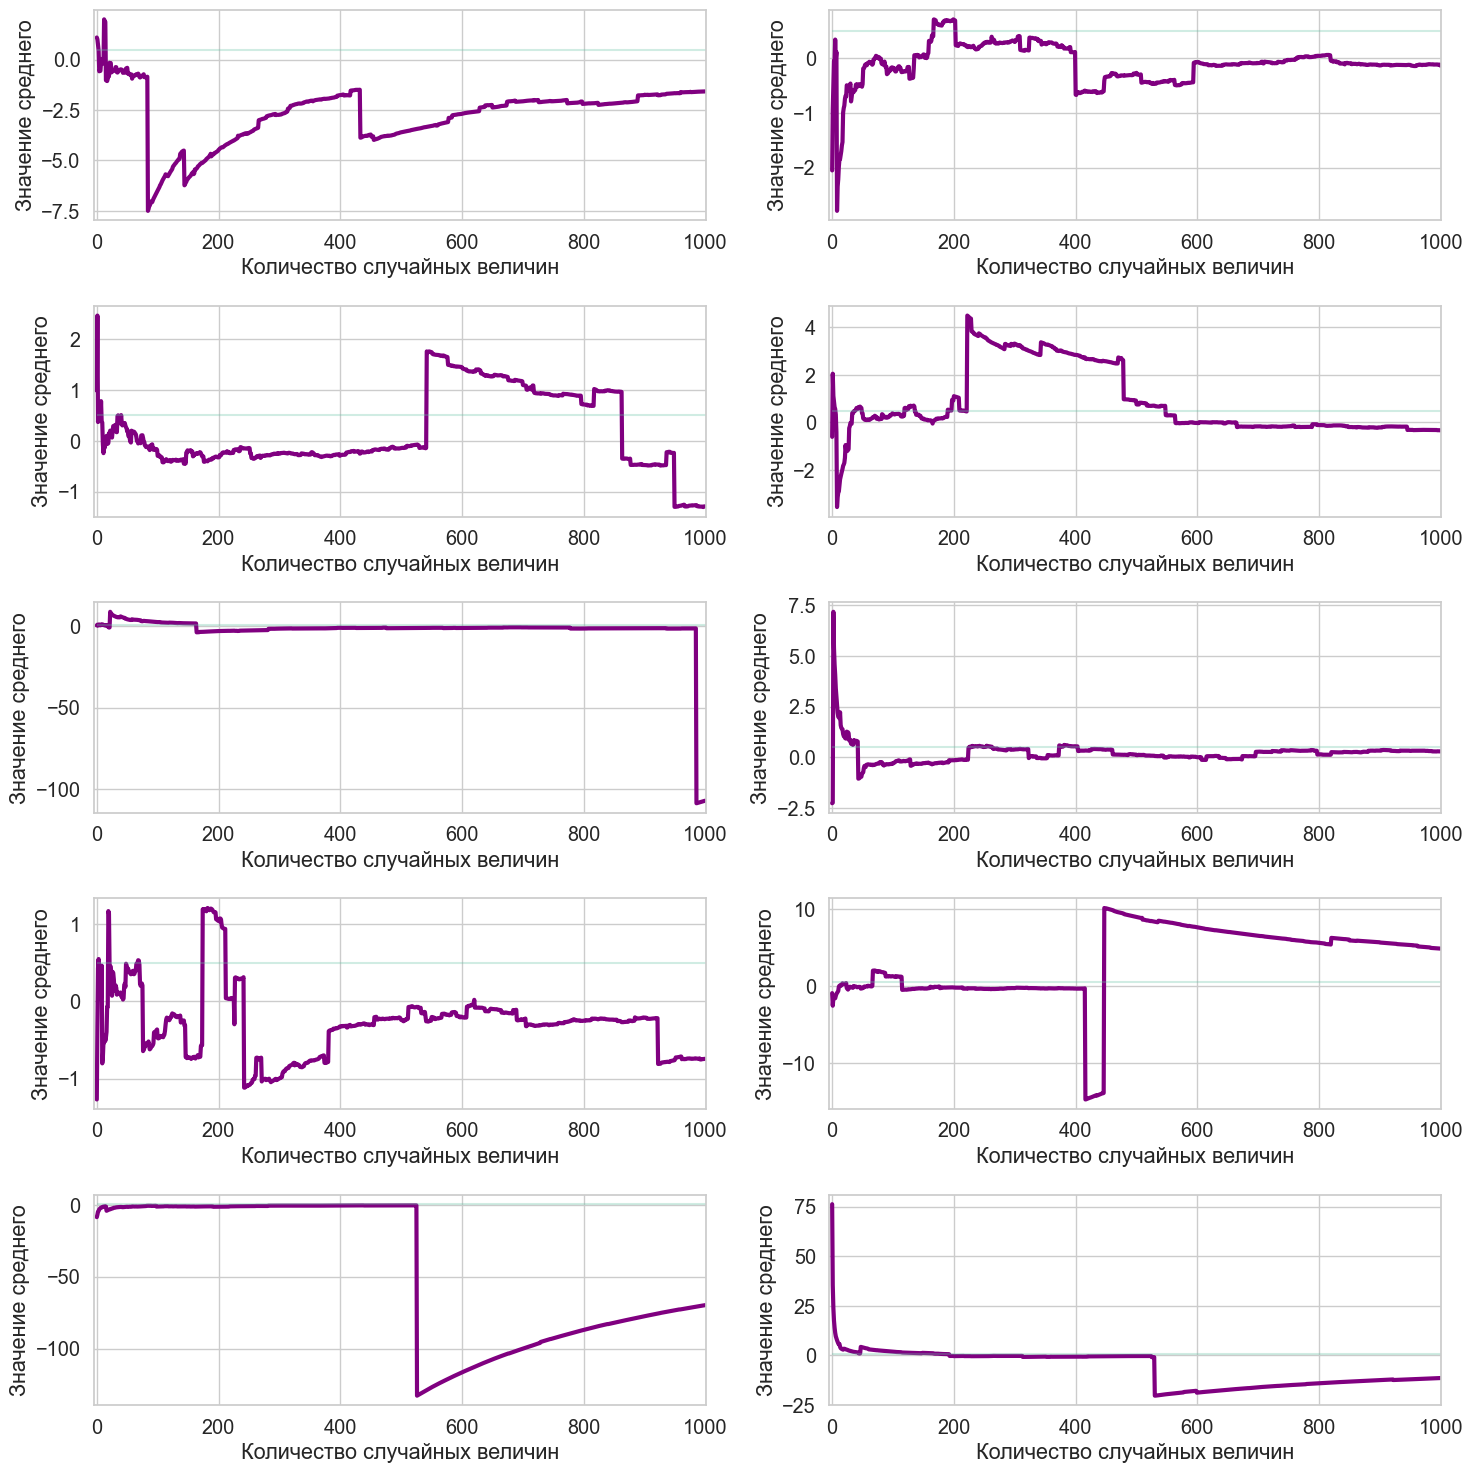

In [24]:
size = 1000
plt.figure(figsize=(15, 15))

for i in range(10):
    
    samples = sps.cauchy.rvs(size=size)
    cum_means = samples.cumsum() / (np.arange(size) + 1)
    
    plt.subplot(5, 2, i+1)
    plt.plot(cum_means, lw=3, color='purple')
    plt.hlines(0.5, 0, size, alpha=0.3)
    plt.xlabel('Количество случайных величин')
    plt.ylabel('Значение среднего')
    plt.xlim((-5, size))
    
plt.tight_layout()

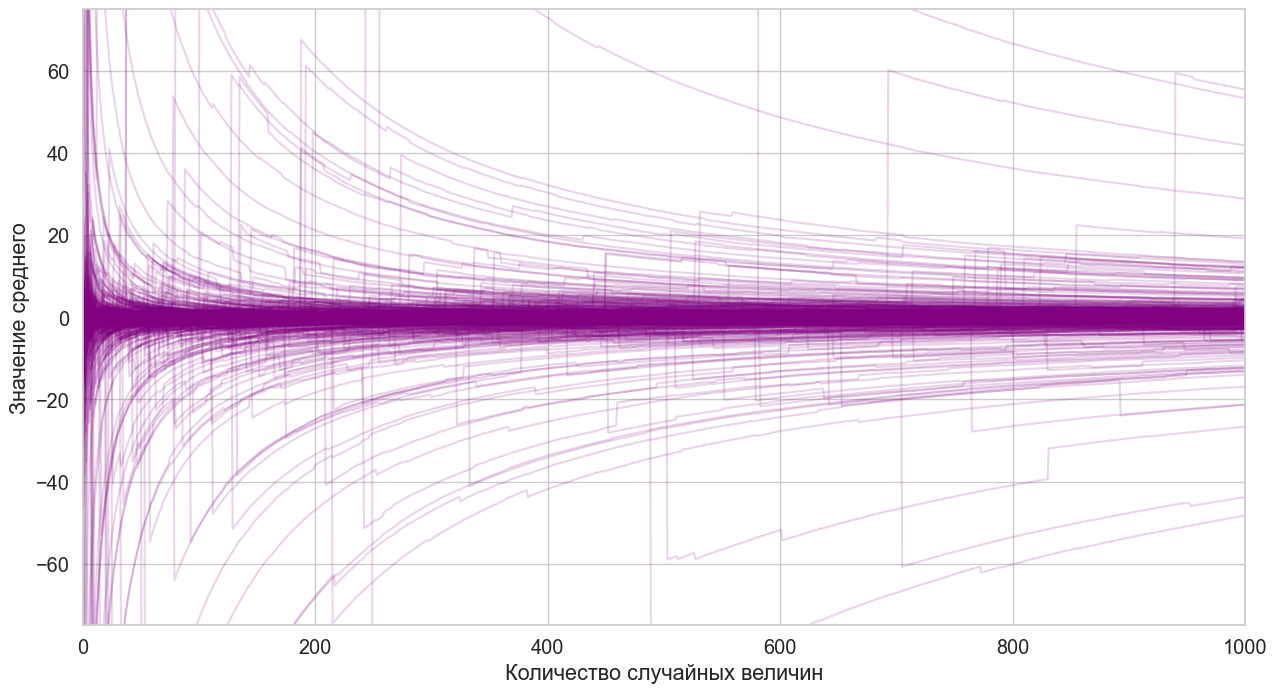

In [25]:
samples_count = 500

samples = sps.cauchy.rvs(size=(samples_count, size))
cum_means = samples.cumsum(axis=1) / (np.arange(size) + 1)

plt.figure(figsize=(15, 8))

for i in range(samples_count):
    plt.plot(np.arange(size) + 1, cum_means[i], color='purple', alpha=0.17)

plt.xlabel('Количество случайных величин')
plt.ylabel('Значение среднего')
plt.xlim((0, size));
plt.ylim((-75,75))
plt.show()

**3.** Аналогичным образом проведите эксперимент по изучению зависимости *выборочной* медианы от размера выборки. Медиану по выборке можно посчитать с помощью <a target="_blank" href="https://numpy.org/doc/stable/reference/generated/numpy.median.html">`np.median`</a>.

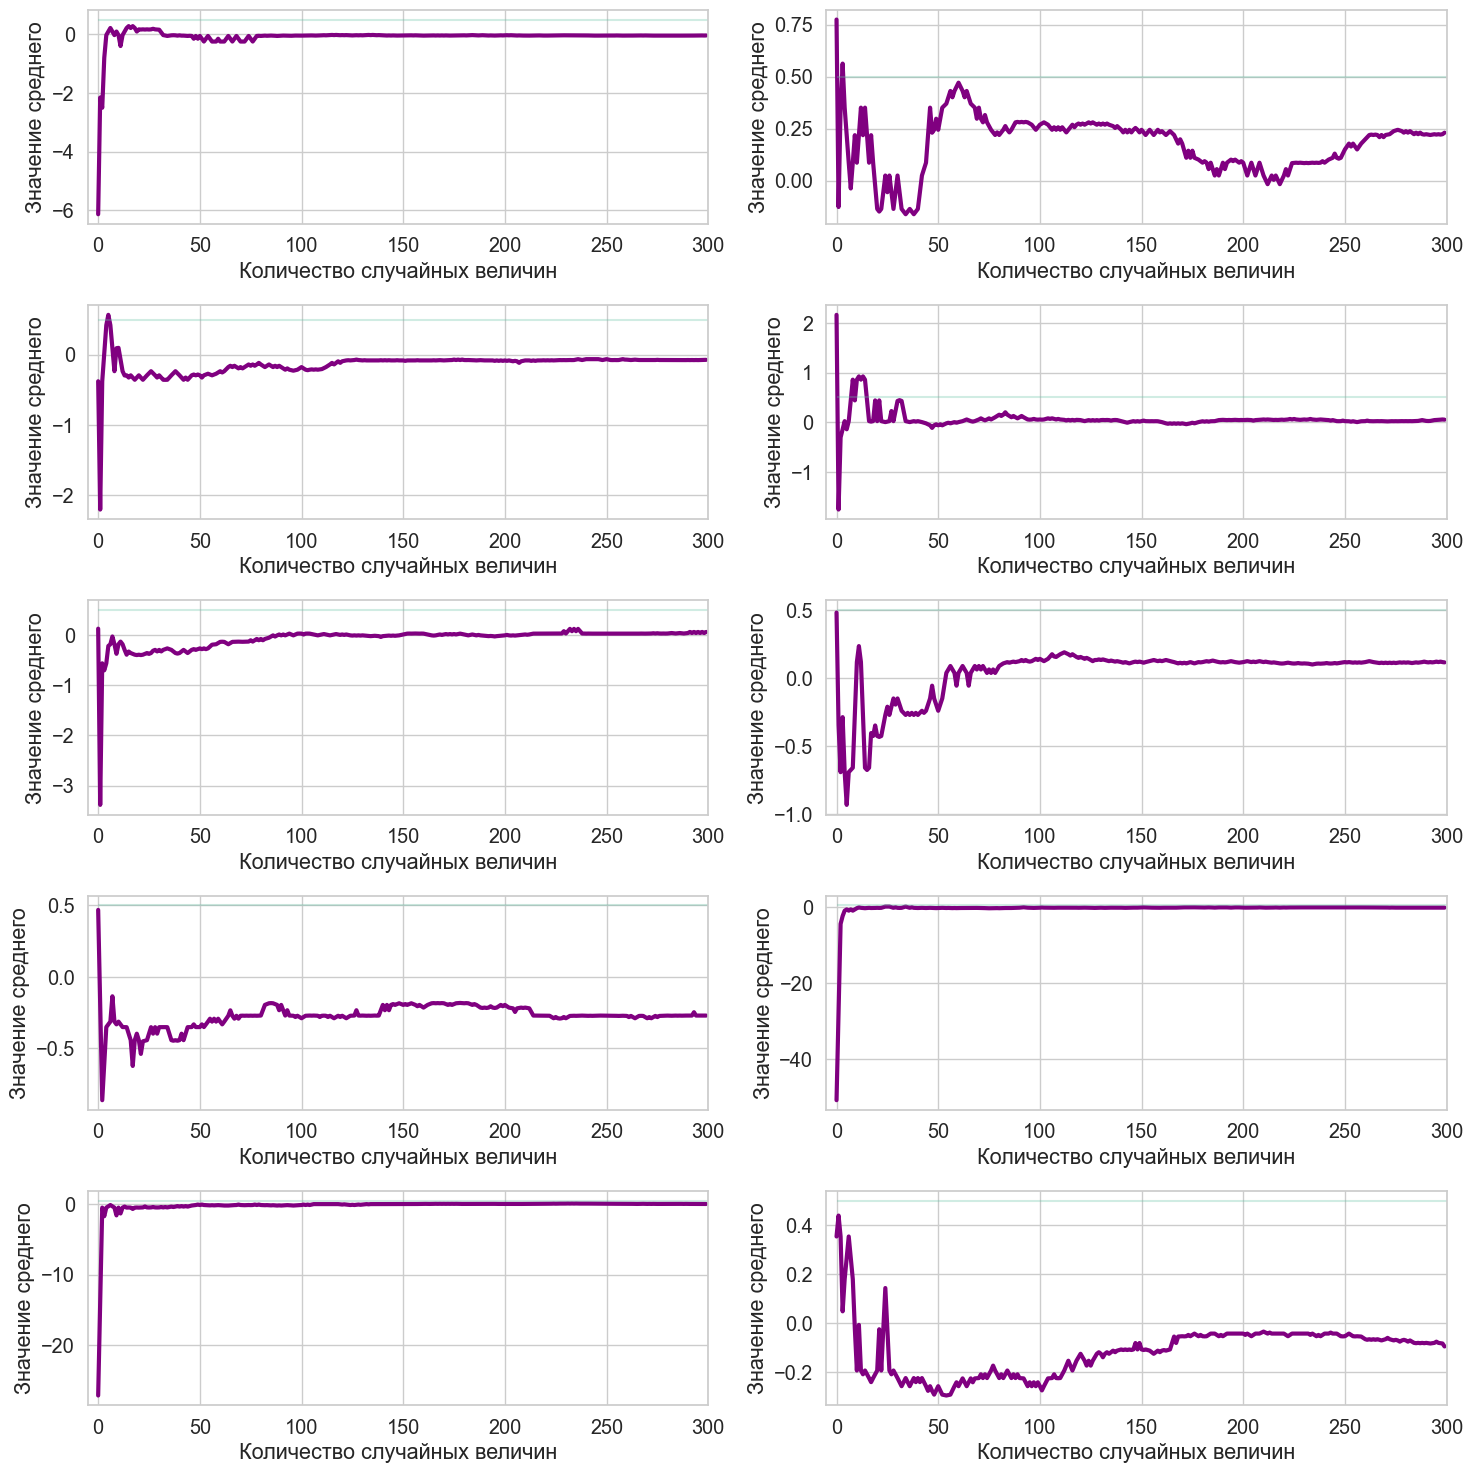

In [26]:
size = 300
plt.figure(figsize=(15, 15))

for i in range(10):
    
    samples = sps.cauchy.rvs(size=size)
    cum_means = []
    for j in np.arange(size) + 1:
        cum_means += [np.median(samples[0 : j])]
    
    plt.subplot(5, 2, i+1)
    plt.plot(cum_means, lw=3, color='purple')
    plt.hlines(0.5, 0, size, alpha=0.3)
    plt.xlabel('Количество случайных величин')
    plt.ylabel('Значение среднего')
    plt.xlim((-5, size))
    
plt.tight_layout()

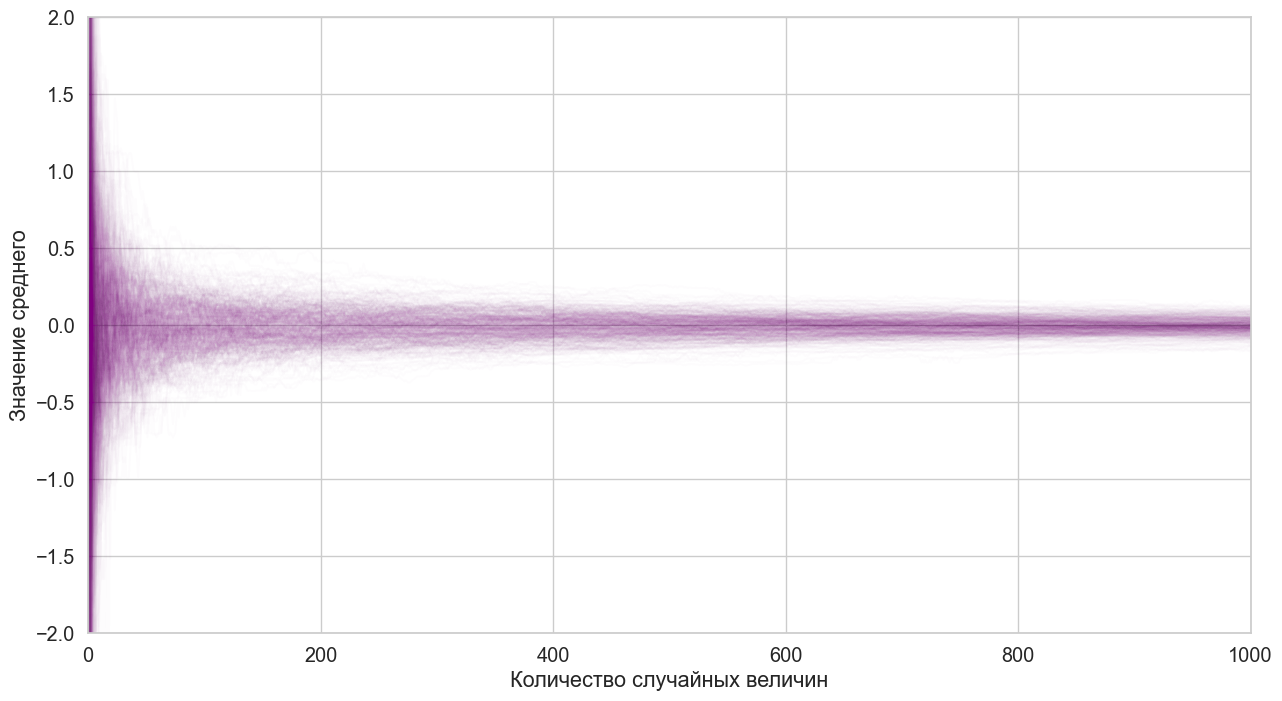

In [28]:
def Medians() :
    samples = sps.cauchy.rvs(size=size)
    cum_means = []
    for j in np.arange(size) + 1:
        cum_means += [np.median(samples[0 : j])]
    return cum_means

size = 1000
plt.figure(figsize=(15, 8))

for i in range(samples_count):
    plt.plot(np.arange(size) + 1, Medians(), color='purple', alpha=0.01)

plt.xlabel('Количество случайных величин')
plt.ylabel('Значение среднего')
plt.xlim((0, size))
plt.ylim((-2, 2))
plt.show()

**Вывод:**

1. Сравнение плотности распредления Коши и нормального распределения показывает, что плотность распределения Коши 
при $x \to \infty$ убывает медленно.

2. При достаточно большом количестве случайных величин значение среднего не сильно отклоняется от математического ожидания, причем чем больше случайных величин просуммированы, тем меньше отклонения. Данный эксперимент хорошо визуализирует закон больших чисел.
 
3. Медиана сходится к нулю, так как в отличии от среднего ей все равно на выбрасываемые распределением Коши 
большие значения, которые могут его портить.


### <font color="orange"><i>Сложная часть</i></font>

### Задача 3.

Перед выполнением этой задачи настоятельно рекомендуется посмотреть <a href="https://miptstats.github.io/courses/ad_fivt/lec3_LLN.html">ноутбук</a> с лекции про закон больших чисел.

На практике не редко возникает вопрос &mdash; **сколько времени потребуется на сбор данных, чтобы оценить среднее с достаточной точностью**. Для ответа на этот вопрос можно использовать различные теоретические оценки, в частности, неравенство Чебышева.

Другой способ &mdash; смоделировать большое количество выборок.
Возьмем в качестве меры отклонения от среднего *среднее значение модуля отклонения от среднего*, то есть
$$F(n) = \frac{1}{K}\sum\limits_{j=1}^{K} \left| S_{nj} - a \right|,$$
где $a$ &mdash; математическое ожидание элемента выборки, $S_{nj}$ &mdash; *выборочное* среднее $n$ элементов в $j$-й выборке, а $K$ &mdash; общее количество выборок.

**1.** Рассмотрим распределения $Bern(a)$ для $a=0.5$. Пусть для нас допустимо отклонение на 0.02, иначе говоря при *истинном* среднем 0.5 мы считаем достаточно точными значения *выборочного* среднего от 0.48 до 0.52. Тогда в качестве *приближения* необходимого размера выборок можно взять наименьшее значение $n$, при котором $F(n) \leqslant 0.02$.

Реализуйте данный эксперимен для $K=500$  и найдите значение $n$. Визуализируйте зависимость $F(n)$ от $n$ в обычном и логарифмическом масштабах (по тем осям, по которым это имеет смысл).

Для реализации без циклов стоит генерировать достаточно большие выборки и использовать функцию `np.where`.

**2.** Повторите данный эксперимент для значений $a$ от 0.05 до 0.95 с шагом 0.05. Визуализируйте зависимость необходимого размера выборки $n$ от значения $a$.

При реализации можно сделать цикл по значениям $a$.

**Выводы:**

...